<a href="https://colab.research.google.com/github/ElpoderdelComputo/Tutoriales_YouTube/blob/main/Curvas_aprendizaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CURVAS DE APRENDIZAJE

Visita y suscribete a:
**El poder del Cómputo**


Trabajaremos con el conjunto de datos de Breast Cancer Wisconsin, que contiene 569 muestras de células tumorales malignas y benignas. Las dos primeras columnas del conjunto de datos almacenan los números de identificación únicos de las muestras y los diagnósticos correspondientes (M = maligno, B = benigno), respectivamente. Las columnas 3 a 32 contienen 30 características de valor real que se han calculado a partir de imágenes digitalizadas de los núcleos celulares, que pueden usarse para construir un modelo para predecir si un tumor es benigno o maligno. El conjunto de datos de Breast Cancer Wisconsin se ha depositado en el Repositorio de aprendizaje automático de la UCI y se puede encontrar información más detallada sobre este conjunto de datos en: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [1]:
import pandas as pd

# Obtenemos los datos directamente usando pandas
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# Revisar los primeros 5 registros
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# Tamaño de los datos
df.shape

(569, 32)

In [3]:
from sklearn.preprocessing import LabelEncoder

# Creamos  una matriz con los datos de entrenamiento X: 30 caracteristicas
X = df.loc[:, 2:].values

y = df.loc[:, 1].values

#  Usando LabelEncoder transformamos las clases a su representacion en 'B', 'M': 1 y 0
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [4]:
le.transform(['M', 'B'])

array([1, 0])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# asignamos 80 % datos de entrenamiento y 20 % de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=1)


# Mostrar cuantos datos hay en total: en entrenamiento y prueba
print('\nNumero de etiquetas en y:', np.bincount(y))
print('Numero de etiquetas en y_train:', np.bincount(y_train))
print('Numero de etiquetas en y_test:', np.bincount(y_test))


Numero de etiquetas en y: [357 212]
Numero de etiquetas en y_train: [285 170]
Numero de etiquetas en y_test: [72 42]


In [7]:
# Estandarizar los datos
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [8]:
from sklearn.svm import SVC

# Crear el modelo suport vector machine
clf = SVC(kernel='rbf', C=1)

# Ajustar el modelo con datos de entrenamiento
clf.fit(X_train_std, y_train)

# Predecir los datos de prueba
y_pred = clf.predict(X_test_std)

# Mostrar la precisión de clasificación correcta
print('Test Accuracy: %.3f' % clf.score(X_test_std, y_test))

Test Accuracy: 0.974


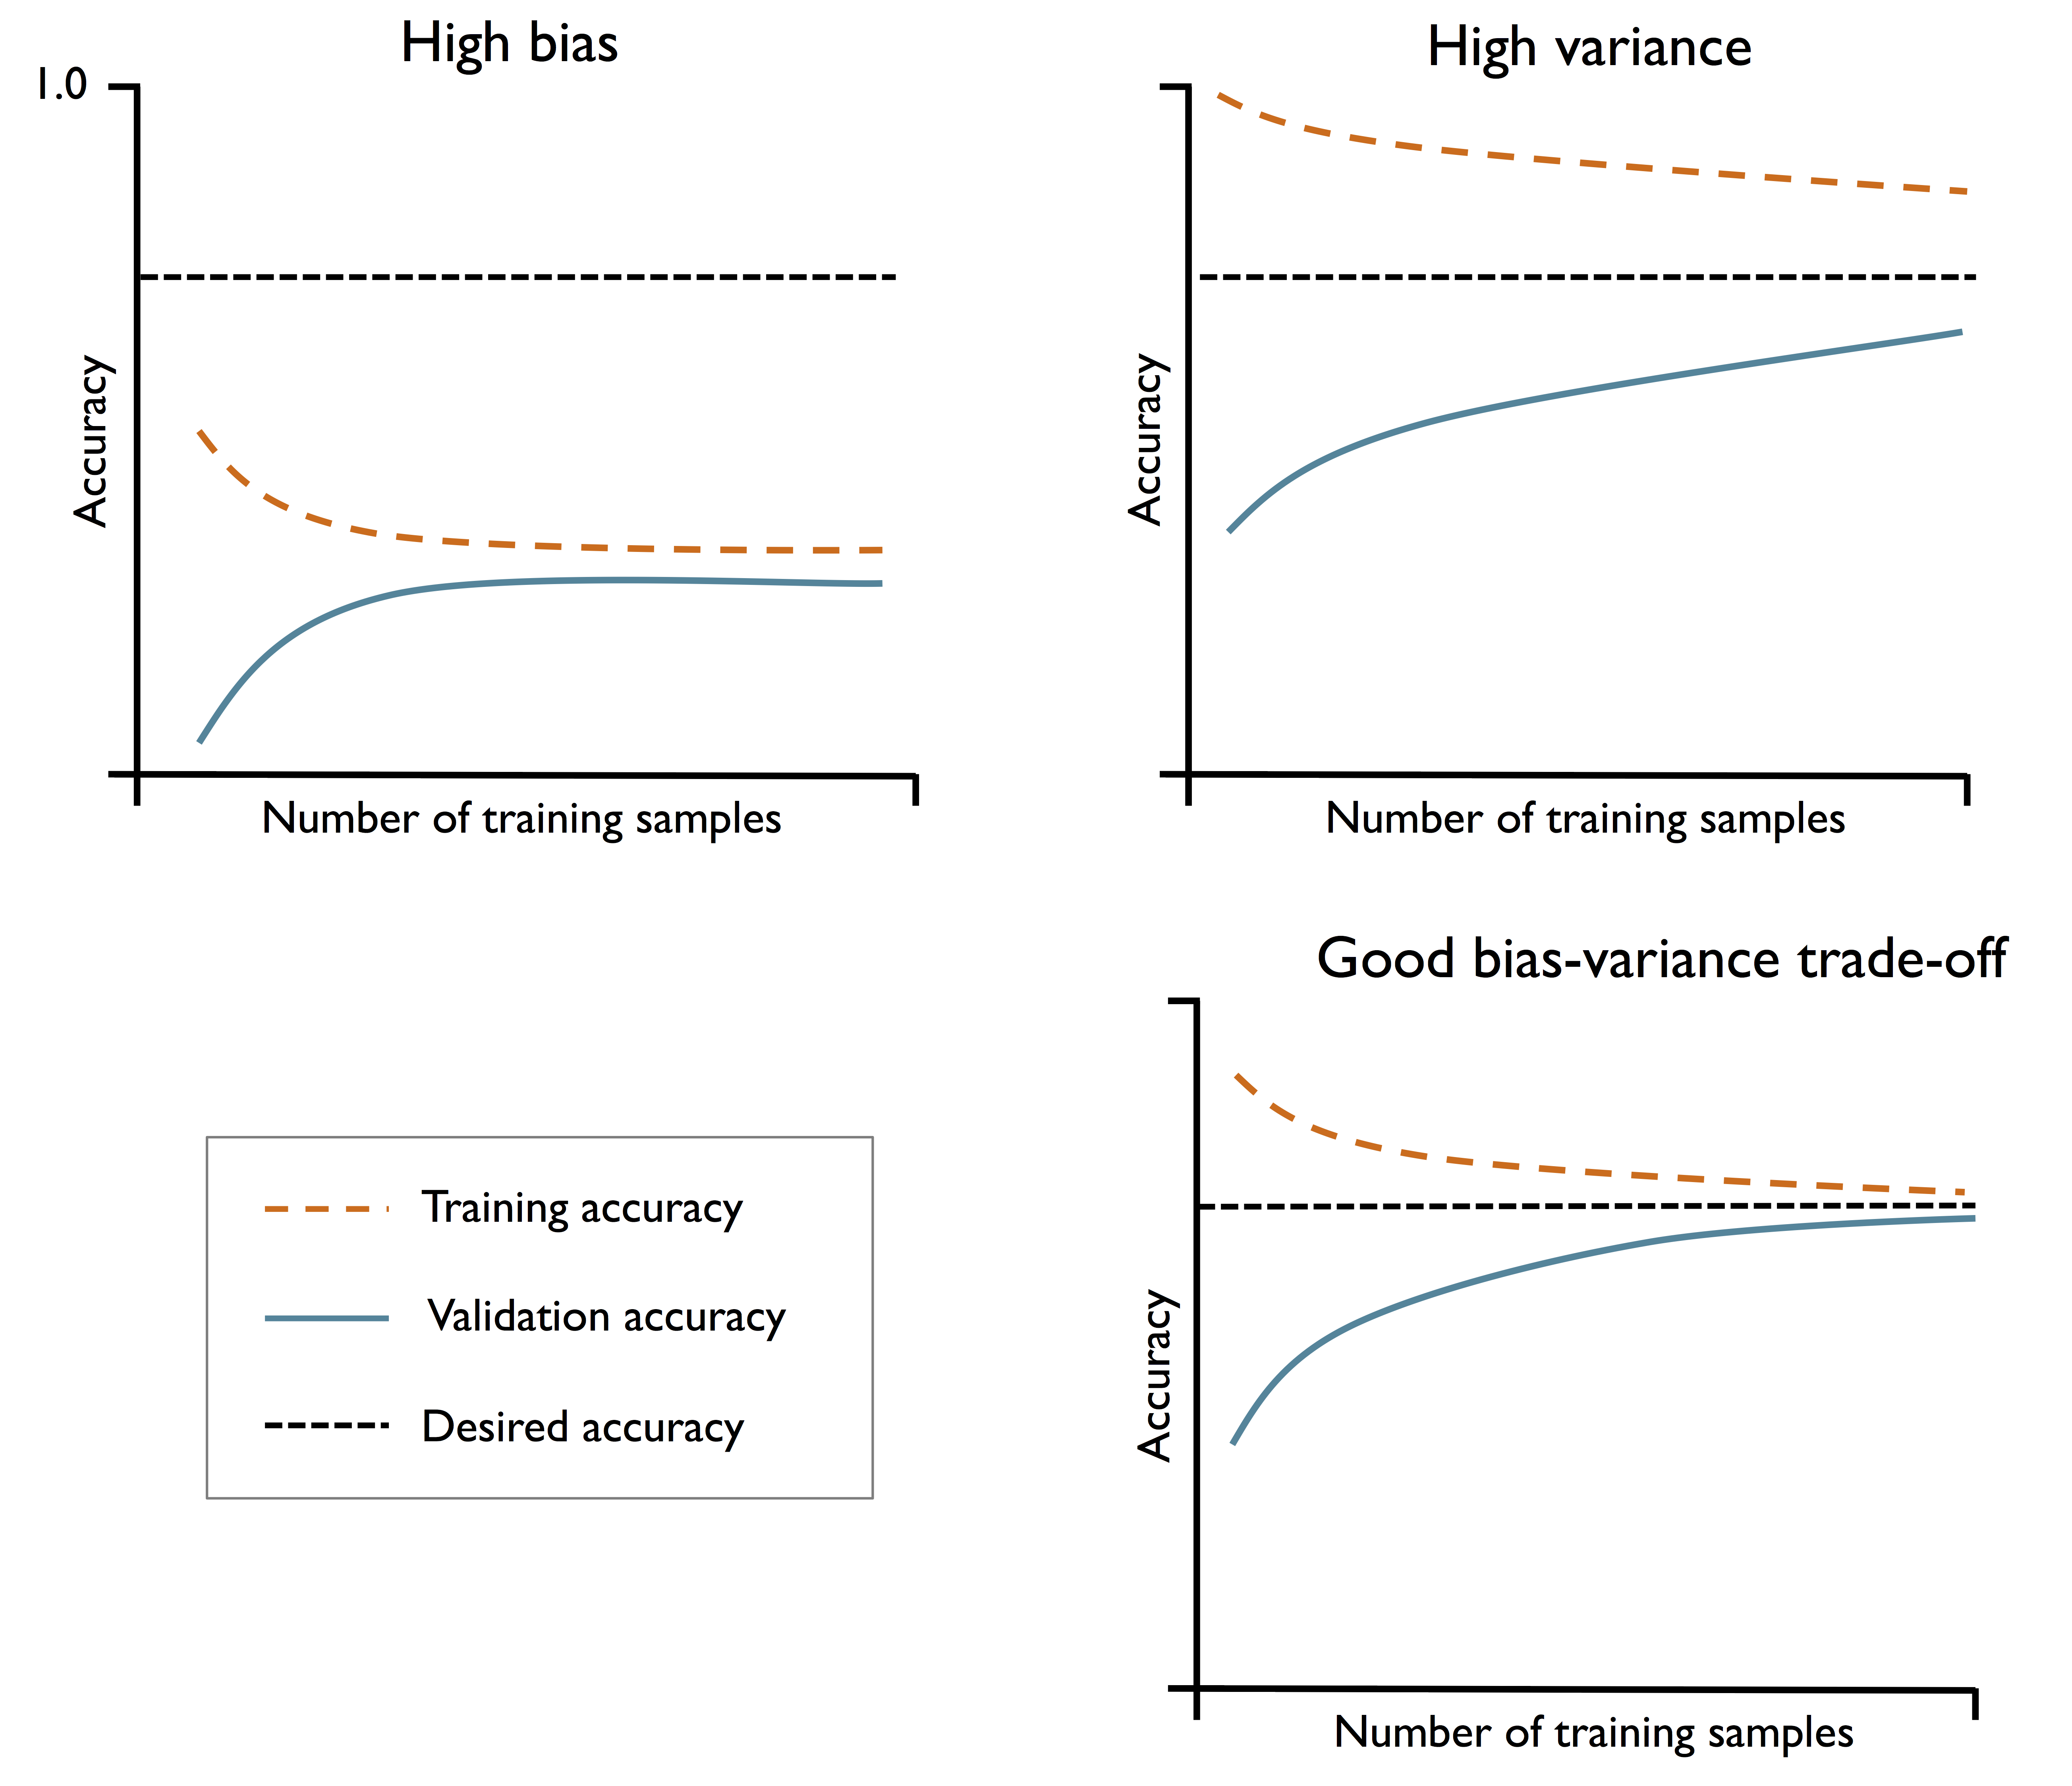

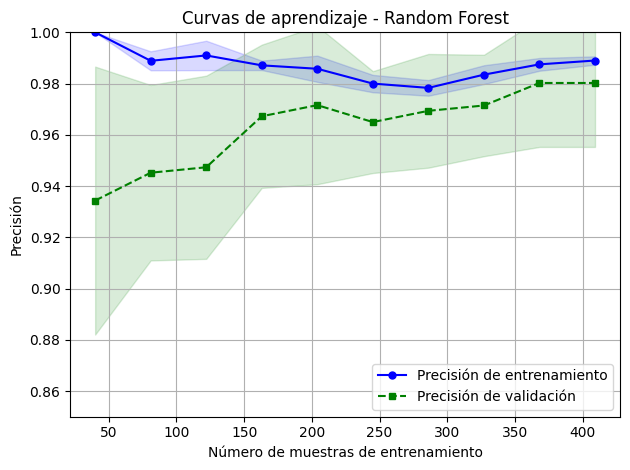

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

# Definir el modelo

clf = SVC(kernel='rbf',
          C=1)
# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator=clf,
                                                        X=X_train_std,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,
                                                        n_jobs=-1)

# Calcular la media y desviación estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Trazo de la precisión de entrenamiento
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Precisión de entrenamiento')

# Trazo de media y desviación estándar de entrenamiento
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

# Trazo de la precisión de validación
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Precisión de validación')

# Trazo de media y desviación estándar de la validación
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

# Configuración de la gráfica
plt.grid()
plt.title('Curvas de aprendizaje - Random Forest')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.ylim([0.85, 1.0])
plt.tight_layout()

# Mostrar la gráfica
plt.show()
